In [1]:
include("load_save.jl")
dataset_name = String(split(split(@__FILE__, '\\')[end], '.')[1])

"DsReds"

In [2]:
R, X, Y, L, MF, SF, Y, PY = load_small_dataset(dataset_name);

Dataset : DsReds_C

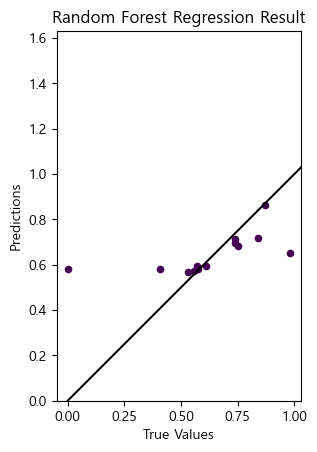

NRMSE : 0.200380


In [3]:
view_result(PY, Y, data_state);

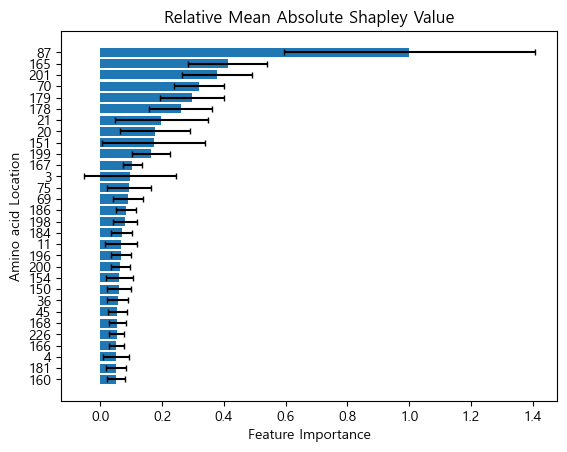

In [4]:
view_importance(R, L, MF, SF, show_number=30);